# K-nearest neighbours model 😮

## /////////////////////////////////////////////

### Issues With Last Time
-Code was incredibly ugly and unelegant <br />
-There was also experimental code in file (Made it hard to read) <br />
-No stratified sampling <br />
-A bit too good of a model (Seemed suspicious)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, normalize
import warnings
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings("ignore")

<br />



## <span style="color: red;"> STEP 1) Insert the data and split into features and labels and encode</span>

In [13]:
dfWDBC = pd.read_csv("Data Exploration/wdbc.csv")


#split into test and features
features = dfWDBC[["Radius","Texture"]]
label = dfWDBC["B/M"]

#Need to encode B/M before proceeding
le = preprocessing.LabelEncoder()
label = le.fit_transform(label)
label = pd.DataFrame(data = label, columns = ["B/M"])


#Need to encode the features
ss = StandardScaler()
features = ss.fit_transform(features)

<br />


##  <span style="color: red;"> STEP 2) split the features and labels into appropriate test and training data using stratified sampling </span>

In [14]:
#All nice and stratified :)
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, stratify = label["B/M"].values, random_state= 1)
#Simples

</br>

##  <span style="color: red;"> STEP 3) Produce a k-nearest neighbours model and test the accuracy </span>

In [15]:
k = 40
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)

print("Test Size = " + str(len(y_test)))
#Testing Accuracy
y_pred = model.predict(x_test)
print("Accuracy Score = " + str(metrics.accuracy_score(y_test,y_pred)))

#Testing errors using accuracy matrix (Thanks Nicky)
c = confusion_matrix(y_test, y_pred)
print(f'True negatives: {c[0][0]}')
print(f'False negatives: {c[1][0]}')
print(f'True positives: {c[1][1]}')
print(f'False positives: {c[0][1]}')

Test Size = 114
Accuracy Score = 0.9122807017543859
True negatives: 70
False negatives: 8
True positives: 34
False positives: 2


////// Left out pretty graph i made last time because its a pain to make and not neccessary rn ////////

# <span style="color: purple;"> My Dilema 😮 </span>

So when i run the k nearest neighbours model with the 2 features being radius and texture it comes up with a bonkers accuracy of around 90%. If you look at the graph though the classification looks so simple that you could probably get a similar result using pen and paper. is this a good thing or should we use the k nearest neighbours for a more complex classification task 🤨

<img src = "https://64.media.tumblr.com/7f8b2bcc968b6662755baf7c3508cf73/tumblr_nshp2dKcyr1utmzuco1_500.gifv">

## Your opinions guys???? 🤔

<IPython.core.display.Javascript object>


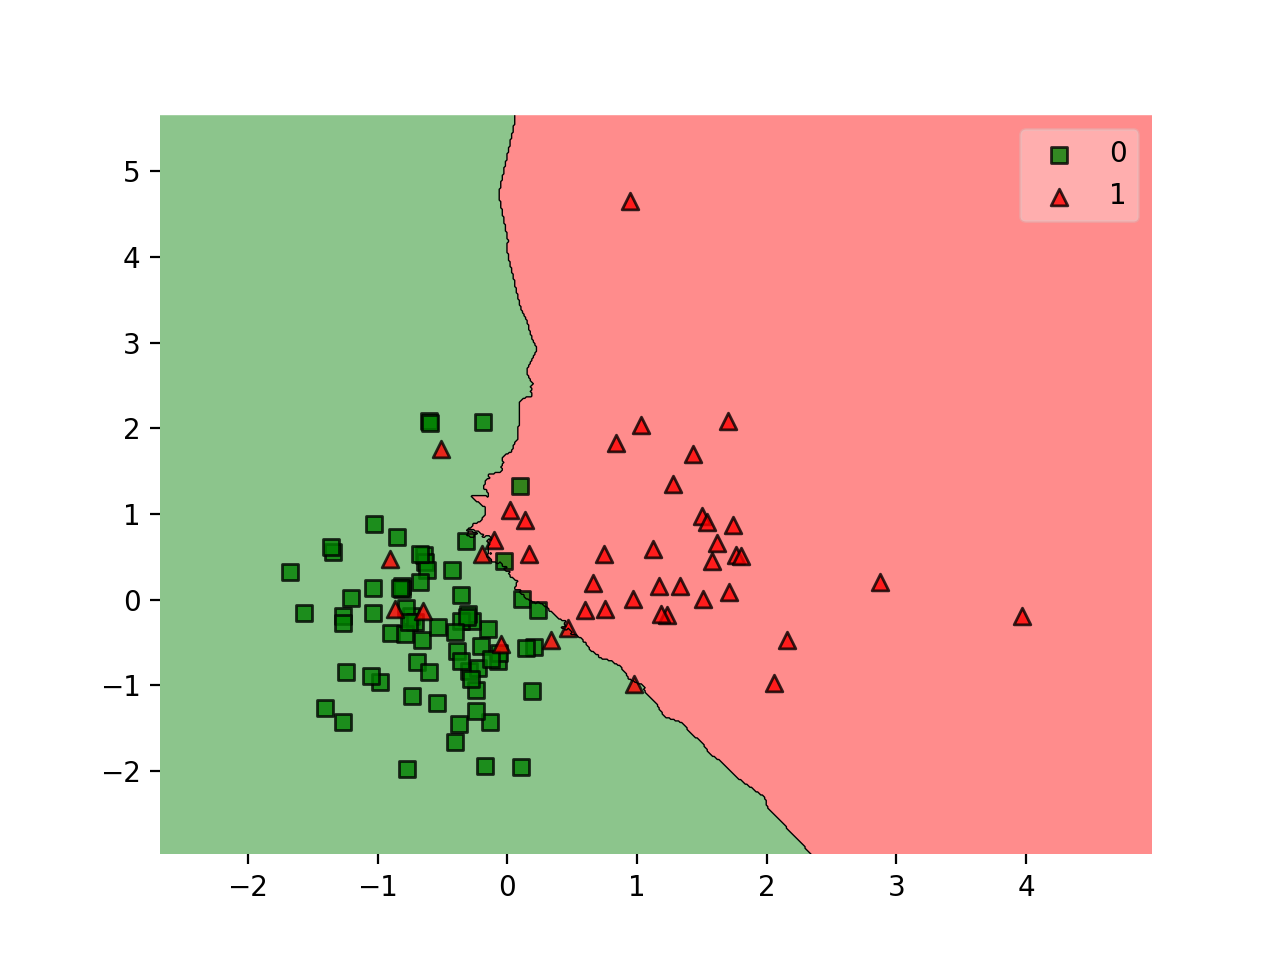

<AxesSubplot:>

In [112]:
%matplotlib notebook
plot_decision_regions(x_test,np.asarray(y_test).flatten(), clf=model, legend=1, colors= "green,red")

In [113]:
model.predict_proba([[3,1/5]])

array([[0., 1.]])

<IPython.core.display.Javascript object>


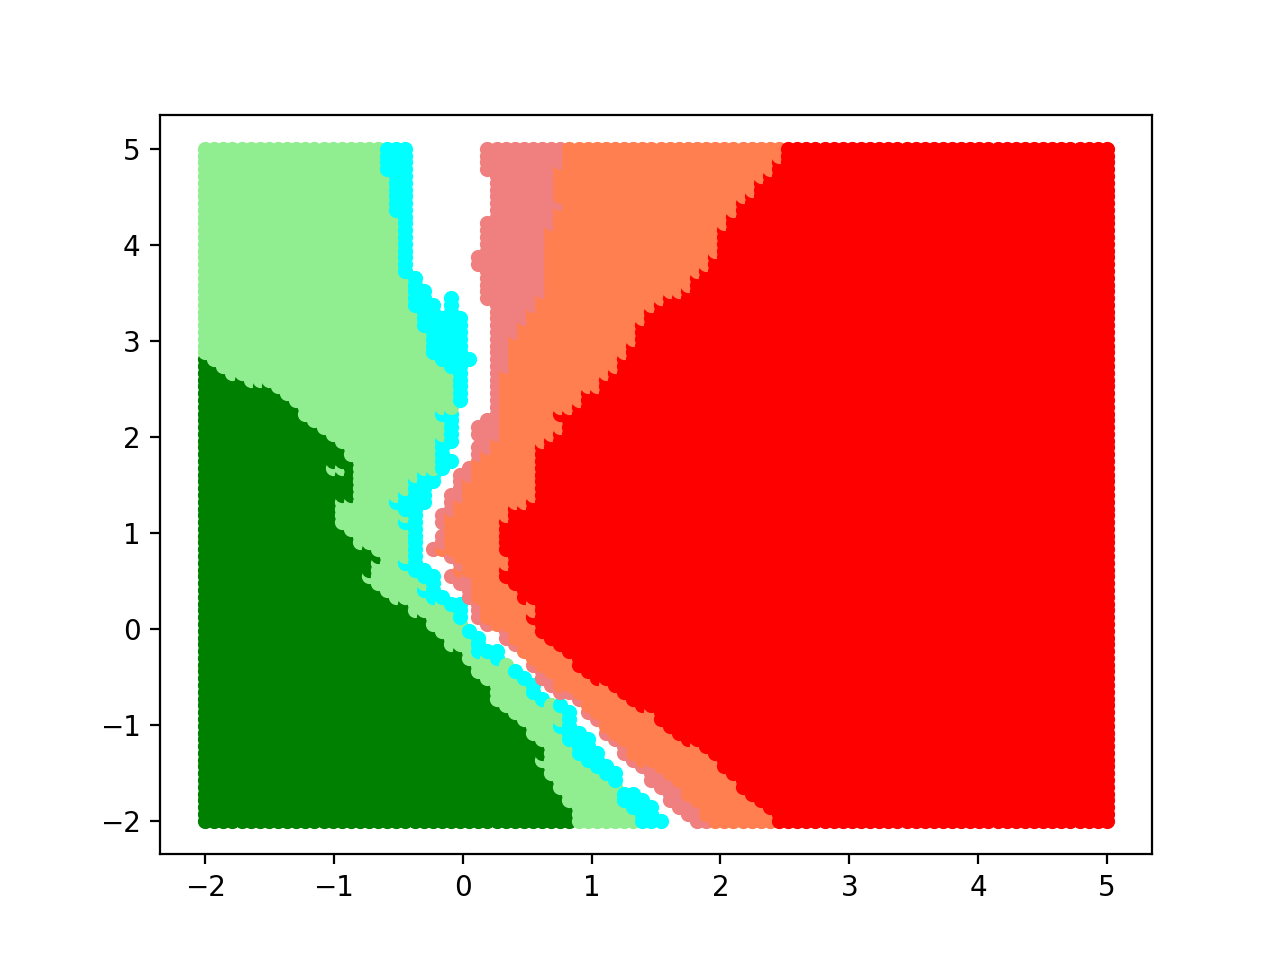

In [114]:
%matplotlib notebook

xRange = np.linspace(-2,5,100)
yRange = np.linspace(-2,5,100)

for x in xRange:
    for y in yRange:
        prob = model.predict_proba([[x,y]])
        if prob[0][1]  <= 0.2:
            plt.scatter(x,y, color = "green", s =20)
        elif prob[0][1] < 0.4:
            plt.scatter(x,y, color = "lightgreen", s = 20)
        elif prob[0][1] < 0.45:
            plt.scatter(x,y, color = "cyan", s = 20)
        elif prob [0][1] < 0.55:
            pass
        elif prob[0][1] < 0.6:
                        plt.scatter(x,y, color = "lightcoral", s=20)
        elif prob[0][1] < 0.8:
            plt.scatter(x,y, color = "coral", s=20)
        else:
            plt.scatter(x,y, color = "red", s =20)

## How can i improve on the visualisation is there a library already existing? sure would be easier

# <span style="color: blue;"> Taking a Step Back </span>

Need to take another look at the data itself and come to a well informed and technicaly profficient way of scaling the data for the model. I will also look more in depth to the model itself to evaluate its weaknesses and strengths which i can elaborate on

### Normalize or Standardize????

### Time to Experiment

In [27]:
features = dfWDBC[["Radius","Texture"]]
features = ss.fit_transform(features)
features = normalize(features)
print(features)
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, stratify = label["B/M"].values, random_state= 1)
k = 40
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)

print("Test Size = " + str(len(y_test)))
#Testing Accuracy
y_pred = model.predict(x_test)
print("Accuracy Score = " + str(metrics.accuracy_score(y_test,y_pred)))

#Testing errors using accuracy matrix (Thanks Nicky)
c = confusion_matrix(y_test, y_pred)
print(f'True negatives: {c[0][0]}')
print(f'False negatives: {c[1][0]}')
print(f'True positives: {c[1][1]}')
print(f'False positives: {c[0][1]}')

[[ 0.46769326 -0.88389084]
 [ 0.98183251 -0.18974964]
 [ 0.96075068  0.27741327]
 ...
 [ 0.32471514  0.94581186]
 [ 0.61835242  0.78590094]
 [-0.82861037  0.55982573]]
Test Size = 114
Accuracy Score = 0.9035087719298246
True negatives: 69
False negatives: 8
True positives: 34
False positives: 3


## Hmmmmm?

Using just normalisation i achieved a horrible accuracy of 0.62 whilst using standardization and then normalization i recieved a worse accuray than just with standardization. Should this happen or is it just the data set?

## Testing overfitting/underfitting (TBC)